In [147]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [148]:
#Read in the csv file and convert to a Pandas dataframe
df_Football_Players = pd.read_csv("..\..\data\clean_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [149]:
df_Football_Players.shape

(10537, 23)

In [150]:
df_Football_Players.head()

,Unnamed: 0,player,team,name,position,height,age,appearance,goals,assists,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
3,4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
4,5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0


## Model




### Feature engineering: 

- Feature scaling
- Aggregation
- One hot coding

-------------------

In [151]:
df_Football_Players = df_Football_Players.drop(['name','player'],axis=1)

In [152]:
categorical_features = df_Football_Players.select_dtypes(include=object).columns
numeric_features = df_Football_Players.select_dtypes(include=np.number).columns
categorical_features

Index(['team', 'position'], dtype='object')

In [153]:
for i in categorical_features:
   print (df_Football_Players[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    45
FC Seoul                  43
Gangwon FC                42
Daegu FC                  42
                          ..
FC Barcelona              21
Swansea City              21
West Ham United           20
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1771
Attack Centre-Forward         1316
Goalkeeper                    1206
midfield-CentralMidfield      1130
midfield-DefensiveMidfield     881
Defender Right-Back            852
Defender Left-Back             788
midfield-AttackingMidfield     760
Attack-RightWinger             705
Attack-LeftWinger              703
midfield-RightMidfield         101
midfield-LeftMidfield           99
midfield                        75
Attack-SecondStriker            64
Attack                          53
Defender                        33
Name: count, dtype: int64


In [154]:
# one hot coding for categorical_features
df_Football_Players = pd.get_dummies(df_Football_Players,columns=categorical_features)


In [155]:
df_Football_Players.head()

,Unnamed: 0,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,0.0,1.217252,...,False,False,False,True,False,False,False,False,False,False
1,1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0000,0.0,1.242331,...,False,False,False,True,False,False,False,False,False,False
2,3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,0.000000,...,True,False,False,False,False,False,False,False,False,False
3,4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,0.000000,...,True,False,False,False,False,False,False,False,False,False
4,5,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,0.000000,...,True,False,False,False,False,False,False,False,False,False


In [156]:
df_Football_Players.shape

(10537, 409)

#### 3. Feature selection


In [157]:
correlation = df_Football_Players.corr()
correlation[abs(correlation['current_value']) > 0.17]['current_value'].sort_values(ascending=False)

current_value           1.000000
highest_value           0.837063
minutes played          0.421619
appearance              0.420535
award                   0.304447
team_Manchester City    0.215586
team_Arsenal FC         0.179663
team_Bayern Munich      0.177779
team_Real Madrid        0.170844
Unnamed: 0             -0.383320
Name: current_value, dtype: float64

In [158]:
# Set the correlation threshold
threshold = 0.17  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['Unnamed: 0', 'appearance', 'minutes played', 'award', 'current_value',
       'highest_value', 'team_Arsenal FC', 'team_Bayern Munich',
       'team_Manchester City', 'team_Real Madrid'],
      dtype='object')

In [159]:
df_Football_Players = df_Football_Players[selected_features]
df_Football_Players.head()

,Unnamed: 0,appearance,minutes played,award,current_value,highest_value,team_Arsenal FC,team_Bayern Munich,team_Manchester City,team_Real Madrid
0,0,104,9390,13,15000000,70000000,False,False,False,False
1,1,15,1304,1,1500000,22000000,False,False,False,False
2,3,82,6408,9,50000000,50000000,False,False,False,False
3,4,63,5031,21,40000000,80000000,False,False,False,False
4,5,68,4762,1,25000000,70000000,False,False,False,False


In [160]:
df_Football_Players.shape

(10537, 10)

### Prepare train and test data


In [161]:
# Prepare data
X = df_Football_Players.drop(['current_value'], axis=1)
y = df_Football_Players['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=99)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
X.shape

(10537, 9)

In [163]:
y.shape

(10537,)

### Build the model

In [164]:
# build the model
model = LinearRegression()


In [165]:
# Train the Model
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [166]:
# Test the Model
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)      # Linear regression model

In [167]:
# Interpretation of the Model
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients


In [168]:
coeff_df

,Coefficient
Unnamed: 0,-1.424180e+04
appearance,-1.084387e+06
minutes played,1.991317e+06
award,-1.957826e+06
highest_value,8.293270e+06
team_Arsenal FC,5.814591e+05
team_Bayern Munich,5.869912e+05
team_Manchester City,7.066661e+05
team_Real Madrid,3.073203e+05


In [169]:
print(f" Linear regression intercept: {model.intercept_}") 


 Linear regression intercept: 3760325.068216871


#### Evaluating the Model


##### Mean Square Error

In [170]:
# Mean Square Error
y_base = [y_train.mean()] * len(y_test)
#y_base


In [171]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 5.421743e+13


In [172]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 2.250273e+13
Mean Squared Error for testing: 1.393151e+13



##### Mean Absolute Error


In [173]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 4.069883e+06


In [174]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 2.123033e+06
Mean Absolute Error for testing: 1.881779e+06


##### Root Mean Squared Error


In [175]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 7.363249e+06


In [176]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 4.743704e+06
Root Mean Squared Error for testing: 3.732494e+06


##### R Square


In [177]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7516832054504949
R Square for testing: 0.7410754978003635


#### Predictions vs. Real Values


In [178]:
predictions = model.predict(X_test_scaled)
predictions

array([-944586.83260439, 4563217.09278971,  473460.36254594, ...,
        433951.70072526,  746084.40595346,  768701.09203792])

In [179]:
Real_Values = np.array(y_test)
Real_Values

array([  125000, 14000000,   500000, ...,   400000,   400000,   500000],
      dtype=int64)

## Lasso & Ridge Regression

In [180]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Lasso Regression
lasso_model = Lasso()  # Adjust alpha for regularization strength


# Ridge Regression
ridge_model = Ridge()  # Adjust alpha for regularization strength


In [181]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [182]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 5}
Best Parameters for lasso model: {'alpha': 5}


#### Test the Model

In [183]:
# Predict and evaluate the model

y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

In [184]:
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients

In [185]:
coeff_df_ridge

,Coefficient
Unnamed: 0,-1.570819e+04
appearance,-1.066203e+06
minutes played,1.974947e+06
award,-1.952463e+06
highest_value,8.283595e+06
team_Arsenal FC,5.818820e+05
team_Bayern Munich,5.870536e+05
team_Manchester City,7.072116e+05
team_Real Madrid,3.078395e+05


In [186]:
coeff_df_lasso

,Coefficient
Unnamed: 0,-1.423259e+04
appearance,-1.084286e+06
minutes played,1.991221e+06
award,-1.957815e+06
highest_value,8.293261e+06
team_Arsenal FC,5.814547e+05
team_Bayern Munich,5.869857e+05
team_Manchester City,7.066615e+05
team_Real Madrid,3.073142e+05


In [187]:
# Print the intercept of the Models
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 

 Ridge model intercept: 3760325.068216871
 Lasso model intercept: 3760325.068216871


### Evaluating the Model

##### Mean Square Error

In [188]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 5.421743e+13


In [189]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')

Mean Squared Error for training ridge model: 2.250281e+13
Mean Squared Error for testing ridge model: 1.392710e+13


In [190]:
# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 2.250273e+13
Mean Squared Error for testing lasso model: 1.393149e+13


In [191]:
# MSE Lasso model
mae_train = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 2.123028e+06
Mean Absolute Error for testing: 1.881773e+06


##### Mean Absolute Error

In [192]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 4.069883e+06


In [193]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 2.122224e+06
Mean Absolute Error for testing ridge model: 1.880871e+06


In [194]:
# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 2.123028e+06
Mean Absolute Error for testing lasso model: 1.881773e+06


##### Root Mean Squared Error

In [195]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 7.363249e+06


In [196]:
# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')

Root Mean Squared Error for training ridge model: 4.743713e+06
Root Mean Squared Error for testing ridge model: 3.731903e+06


In [197]:
# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 4.743704e+06
Root Mean Squared Error for testing lasso model: 3.732491e+06


##### R Square

In [198]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.751682279366433
R Square for testing ridge model: 0.7411574704398501


In [199]:
# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.7516832054367601
R Square for testing lasso model: 0.741075907602712


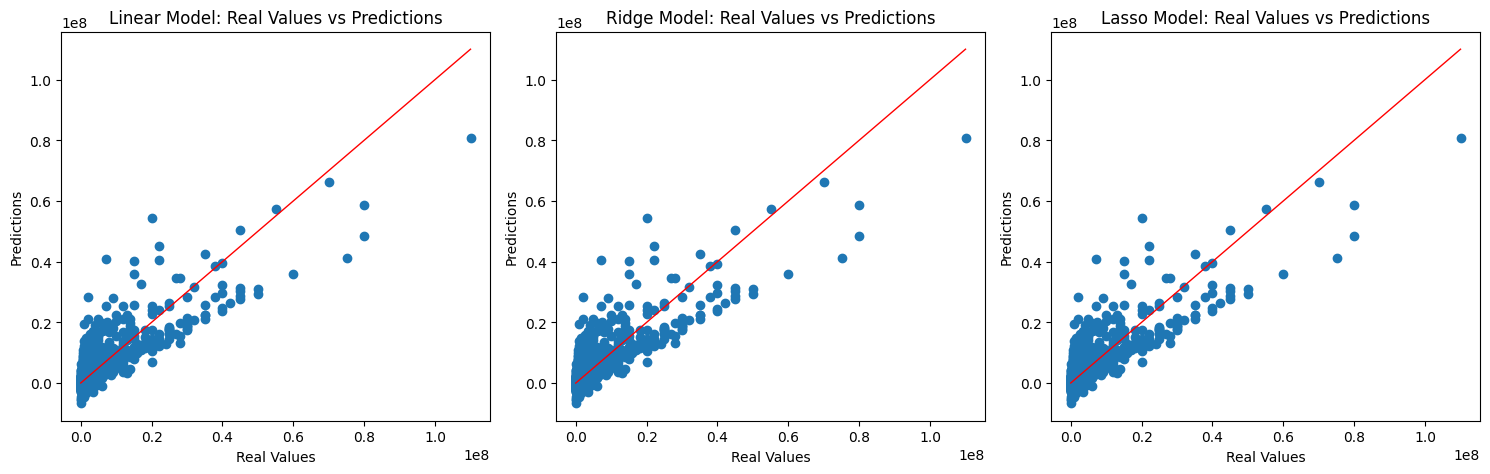

In [200]:
# Linear Model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Linear Model: Real Values vs Predictions')

# Ridge Model
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Ridge Model: Real Values vs Predictions')

# Lasso Model
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Lasso Model: Real Values vs Predictions')

plt.tight_layout()
plt.show()

## Residual Histogram


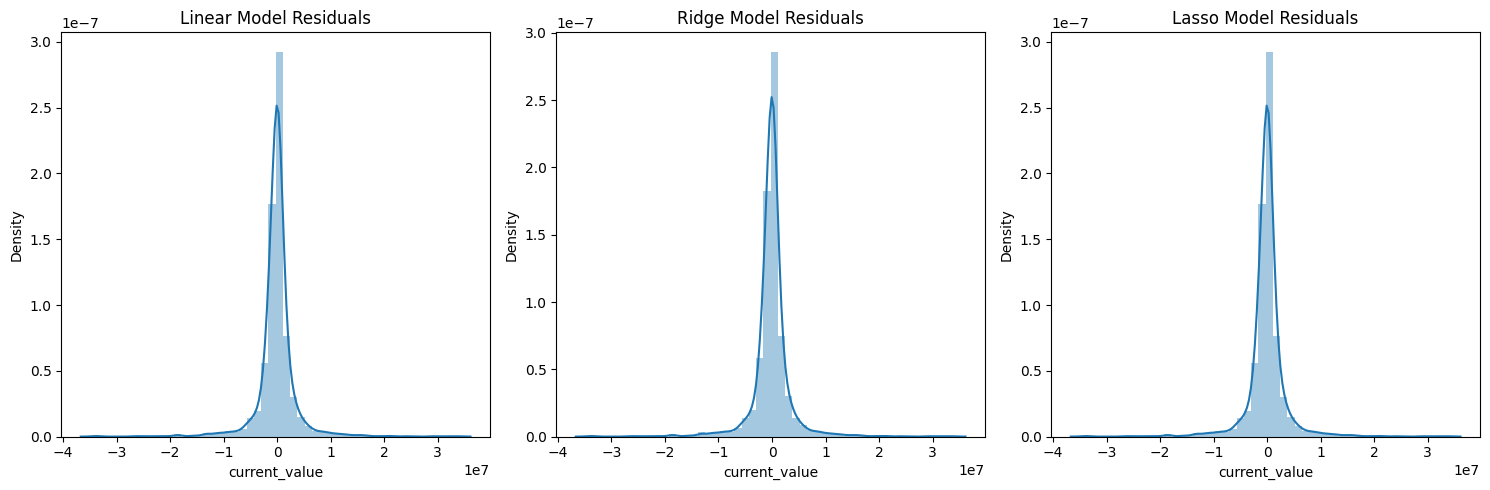

In [201]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.distplot((y_test - y_pred), bins=50)
plt.title('Linear Model Residuals')

plt.subplot(1, 3, 2)
sns.distplot((y_test - y_pred_ridge), bins=50)
plt.title('Ridge Model Residuals')

plt.subplot(1, 3, 3)
sns.distplot((y_test - y_pred_lasso), bins=50)
plt.title('Lasso Model Residuals')

plt.tight_layout()
plt.show()